<img src='./figures/logo_ecole_polytechnique_IPP.png' style='position:absolute; top:0; right:0;' width='80px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Algorithms for Discrete Mathematics, year 2, semester 1</center>
<center>Lecturer: Ziad Kobeissi <a href="mailto:ziad.kobeissi@inria.fr">(send mail)</a></center>
<center>Notebook by Lucas Gérin</center>

# Graphs and Matrices 1: Adjacency Matrices


## Table of contents

- [Adjacency Matrices](#Paths)
- [Enumeration of words](#words)
- [Transition Matrices and Absorption probabilities](#Escape)
- [Bonus](#Target)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


<!--<div markdown=1 class="Rmk"> Here is the Latex code of a matrix that you can copy/paste throughout the notebook:
$$
M=
\begin{matrix}
v_1 \\ v_2 \\ v_3 
\end{matrix}
\begin{pmatrix}
1 & 1 & 0\\
0 & 0 & 1\\
0 & 1 & 0\\
\end{pmatrix}.
$$-->


<a id="Paths"></a>
# Adjacency Matrices

### Exercise 1. Warm-up
Let $G$ be the following graph:
<img src="figures/GrapheBasique.jpg" style="width: 200px;"/>


<div markdown=1 class="DoIt"> Use the adjacency matrix of $G$ to compute the number of paths of length $20$ from $d$ to $c$ in $G$.

In [4]:
def mat_mul (A , B):
    n = len(A)
    ret = [[0 for _ in range(n)] for _ in range(n)]
    for i in range (n):
        for j in range(n):
            for k in range(n):
                ret[i][j] += A[i][k] * B[k][j]

    return ret

G = np.array([[0,1,0,0] , 
     [1,0,1,1],
     [1,0,0,0],
     [1,0,0,0]])

G_20 = np.linalg.matrix_power(G , 20)
print(G_20[3][2])

488


<div markdown=1 class="Answers"> 
    488

<a id="words"></a>
##  Enumeration of words

### Exercise 2. $b$ never followed by $c$

<div markdown=1 class="DoIt"> We consider words with letters $a,b,c$. Let $M_n$ be the number of words of length $n$ (the length of a word is the number of letters) such that a $b$ is never immediately followed by a  $c$.

For example $M_2=8$:
$$
aa,\ ab,\ ac,\ ba,\ bb,\ ca,\ cb,\ cc.
$$

**Question 1.** Write a script which computes $M_1,M_2,\dots,M_{20}$ using a graph and its adjacency matrix. You can consider the following graph:
<br><br>
<center>
<img src="figures/Graphe_abc.jpg" style="width: 200px;"/></center>
<br>


<div markdown=1 class="Answers"> 

**Question 1.** 
starting from M2:
8
21
55
144
377
987
2584
6765
17711
46368
121393
317811
832040
2178309
5702887
14930352
39088169
102334155
267914296
701408733
1836311903

In [10]:
G = np.array([[1,1,1],
              [1,1,0],
              [1,1,1]])
M = []

def I(n):
    ret = [[0 for _ in range(n)] for _ in range(n)]
    for i in range (n):
        ret[i][i] = 1
    return ret

base = I(3)
for i in range(21):
    base = G @ base
    M.append(sum( [sum([base[j][i] for i in range(3)]) for j in range(3)] ))
    print(M[-1])

8
21
55
144
377
987
2584
6765
17711
46368
121393
317811
832040
2178309
5702887
14930352
39088169
102334155
267914296
701408733
1836311903


### Exercise 3.  $b$-short words
<div markdown=1 class="DoIt"> We say that a word $w$ with letters $a,b$ is $b$-<i>short</i> if there are never $4$ consecutive $b$'s in $w$. For instance,
$$
w_1=aa\color{green}{b}aaaaaa\color{green}{bbb}aaa\color{green}{b}aa
$$
is $b$-short while
$$
w_2=aa\color{green}{b}aa\color{green}{bb}a\color{red}{bbbbbb}aa\color{green}{bb}a
$$
is not. Let $S_n$ be the number of $b$-short words of length $n$.

Write a script which computes $S_1,S_2,\dots,S_{20}$ using a graph and its adjacency matrix.


<div markdown=1 class="Answers"> 

**Question 1.** 
2
4
8
15
29
56
108
208
401
773
1490
2872
5536
10671
20569
39648
76424
147312
283953
547337

In [12]:
# a -> 1b , a
# 1b -> a , 2b ...
#             a 1b 2b 3b
G = np.array([[1, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 0, 0, 1],
              [1, 0, 0, 0]])

base = I(4)
base[2][2] = 0
base[3][3] = 0
S = []
for i in range(1 , 21):
    S.append(sum( [sum([base[j][i] for i in range(4)]) for j in range(4)] ))
    print(S[-1])
    base = base @ G

2
4
8
15
29
56
108
208
401
773
1490
2872
5536
10671
20569
39648
76424
147312
283953
547337


<a id="Escape"></a>
# Transition matrices

### Exercise 4. Labyrinth.

We consider a random robot in the following labyrinth:

<img src="figures/Labyrinthe.jpg" style="width: 250px;"/>

The robot is initially in room $B$ (time $n=0$). At each time step, it chooses uniformly at random one of the doors of the room in which it is located, and passes through that door.<br> If the robot hits Exit $1$ (resp. $2$) it stays at Exit $1$ (resp. $2$) forever.

<div markdown=1 class="DoIt"> 

Let $p(n)$ denote the vector of the probability distribution of the location of the robot at time $n$. More formally,
$$
p(n)=\bigg(p_x(n) \bigg)_{x\in \{A,B,C,D,E,\text{Exit }1,\text{Exit }2\}},
$$
where $p_x(n)$ is the probability that the robot is at $x$ at time $n$. Of course we have that
$$
p(0)=(0,1,0,0,0,0,0).
$$

1) Use a transition matrix $M$ to compute approximate values of $p(5)$ and $ p(100)$. 

2) If we wait long enough the robot eventually escapes the labyrinth, either through Exit 1 or Exit 2. By raising $M$ to some large enough power ($100$ should be fine), find a numerical approximation of the probability that the robot escapes the labyrinth through Exit $1$.

<div markdown=1 class="Answers"> 
    [0.22402263 0.         0.10442387 0.         0.22402263 0.24074074
 0.20679012]
[0.00000000e+00 1.17582781e-06 0.00000000e+00 9.21664841e-07
 0.00000000e+00 4.66665811e-01 5.33332092e-01]

In [25]:
G = np.array([[0,1,0,1,0,0,0],
              [1,0,1,0,1,0,0],
              [0,1,0,0,0,1,0],
              [1,0,0,0,1,0,0],
              [0,1,0,1,0,0,1],
              [0,0,0,0,0,1,0],
              [0,0,0,0,0,0,1]], dtype= float)

n = len(G)

for i in range(n):
    S = sum([G[i][j] for j in range(n)])
    for j in range(n):
        G[i][j] = float(G[i][j] / S)
# print(G)

state_0 = np.array([0,1,0,0,0,0,0] , dtype= float)

state_5 = state_0 @ np.linalg.matrix_power(G , 5)
print(state_5)

state_100 = state_0 @ np.linalg.matrix_power(G , 100)
print(state_100)

print("robot escapes through 1: " , int(state_100[5] * 100) , "% of the time")


[0.22402263 0.         0.10442387 0.         0.22402263 0.24074074
 0.20679012]
[0.00000000e+00 1.17582781e-06 0.00000000e+00 9.21664841e-07
 0.00000000e+00 4.66665811e-01 5.33332092e-01]
robot escapes through 1:  46 % of the time


<div markdown=1 class="Answers"> 
    robot escapes through 1:  46 % of the time

<div markdown=1 class="DoIt">
We still assume that the robot starts at $B$.<br>
Denote by $L_n$  the event "The robot is still in the labyrinth at time $n$" (<i>i.e.</i> it dit not find the exit yet). <br>

1) Use your matrix $M$ to plot $n\mapsto \mathbb{P}(L_n)$. (Try $1\leq n\leq 40$.)<br>

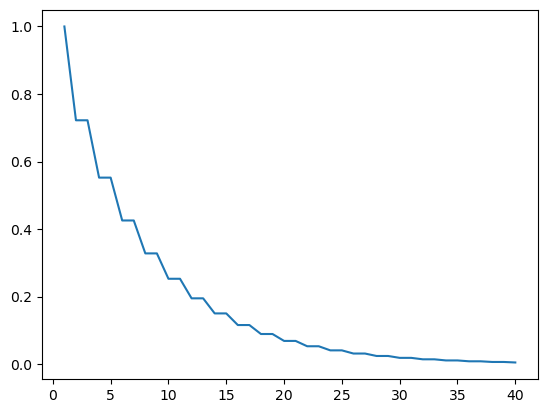

In [28]:
crt_state = state_0

L = []

for i in range(1 , 41):
    crt_state = crt_state @ G
    L.append(sum([crt_state[i] for i in range(5)]))

plt.plot(range(1 , 41) , L)
plt.show()

<div markdown=1 class="DoIt"><br> 
Question 3). For $x\in \{A,B,C,D,E\}$ let $\pi_x$  be the probability that starting from $x$ the robot exits the labyrinth through Exit 1.<br>
Write a system of equations for $\pi_A, ...,\pi_E$ (you can use the method explained in the <i>Math Toolbox</i>). Use `numpy` to solve the system and compare with your approximation obtained previously.<br>

<i>NB: If you want to solve with `numpy` the system 
$$
\begin{cases}
x+3y&=1\\
2x-y&=0
\end{cases}
$$
you can use `np.linalg.solve`:</i>
```
A=np.array([[1,3],[2,-1]])
B=np.array([1,0])
print(np.linalg.solve(A, B))
```

<div markdown=1 class="Answers"> 

<a id="Target"></a>
## Bonus: The target (taken from BX2022's Test)

A player plays the following game: 

* A target $T \in \{1,2,3,\dots \}$ is fixed.
* The player starts from $0$ and keeps throwing a fair die (with six faces) until the cumulative sum is $\geq T$ and then stops.
* If the player ends right on $T$ then the player has won, otherwise (<i>i.e.</i> the player ends on $T+1$, $T+2$,...,  $T+5$) the player has lost. 

Here is an example with $T=12$:
$$
0 \stackrel{\text{dice = }3}{\longrightarrow} 3 \stackrel{\text{dice = }5}{\longrightarrow} 8\stackrel{\text{dice = }1}{\longrightarrow} 9\stackrel{\text{dice = }4}{\longrightarrow} 13\ \text{(Lost)}
$$

<div markdown=1 class="DoIt"> Write a function or a script in python which computes the winning probability $p_T$ when the target is $T$. Explain your strategy and justify that it is correct.<br><br>
<i>In order to check your code:
$$
p_1=0.166667\dots,\quad p_2=0.194444\dots,\quad p_9=0.280369\dots
$$</i>

<div markdown=1 class="Answers"> 

<div markdown=1 class="DoIt"> For which target $1\leq T \leq 30$ is the game the most favourable?

<div markdown=1 class="Answers"> 